<h1 align="center">OpenMP part 2</h1> 

## Exercise 1:

Using your code 2D non linear convection equation from the `numba_pyccel_assignments`:
1. Parallelize the 2D non linear convection equation
2. Compare cpu time using different number of threads (Plot a figure of cpu time according to number of threads)

In [1]:
import numpy as np
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D

import time

#fill the libraries import
from pyccel.epyccel import epyccel
from pyccel.decorators import types
from pyccel.stdlib.internal.openmp import omp_set_num_threads, omp_get_num_threads, omp_get_thread_num

In [7]:
def solve_2d_nonlinearconv_pure(u, un, v, vn, nt, dt, dx, dy):

    ###Assign initial conditions
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    ##set hat function I.C. : v(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape
    
    #fill the update of u and v
    for n in range(nt):
        for i in range (row):
            for j in range(col):
                un[i,j] = u[i,j]
                vn[i,j] = v[i,j]
        for i in range(1, row-1):
            for j in range(1,col-1):
                u[i,j] = un[i,j] - (un[i,j] *( dt / dx) * (un[i,j] - un[i-1,j])) - (vn[i,j] * (dt / dy) * (un[i,j] - un[i,j-1]))
                v[i,j] = vn[i,j] - (un[i,j] * (dt / dx) * (vn[i,j] - vn[i-1,j])) -( vn[i,j] * (dt / dy) * (vn[i,j] - vn[i,j-1]))
                

        
    return 0

### Inputs

/tmp/ipykernel_4877/904954464.py:22: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
/tmp/ipykernel_4877/904954464.py:28: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


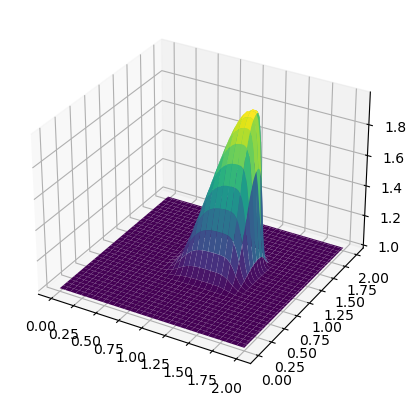

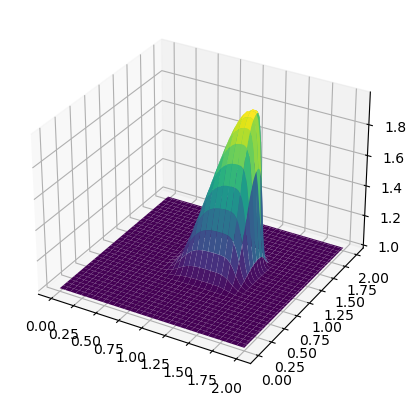

In [8]:
##variable declarations
nx = 101
ny = 101
nt = 80
#c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .2
dt = sigma * dx

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx)) ##create a 1xn vector of 1's
v = np.ones((ny, nx))
un = np.ones((ny, nx))
vn = np.ones((ny, nx))     

solve_2d_nonlinearconv_pure(u, un, v, vn, nt, dt, dx, dy)

fig = pyplot.figure(figsize=(7, 5), dpi=100)
ax = fig.gca(projection='3d')                      
X, Y = np.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u, cmap=cm.viridis)


fig = pyplot.figure(figsize=(7, 5), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, v, cmap=cm.viridis)

In [16]:
%%file Nonlinear_2D_2.py
# write your code here
@types('float[:,:]','float[:,:]','float[:,:]','float[:,:]','int','float','float','float')
def solve_2d_nonlinearconv_pure(u, un, v, vn, nt, dt, dx, dy):

    ###Assign initial conditions
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    ##set hat function I.C. : v(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape
    
    #fill the update of u and v
    #$ omp parallel
    for n in range(nt):
        #$ omp for collapse(2)
        for i in range (row):
            for j in range(col):
                un[i,j] = u[i,j]
                vn[i,j] = v[i,j]
        #$ omp for collapse(2)
        for i in range(1, row-1):
            for j in range(1,col-1):
                u[i,j] = un[i,j] - (un[i,j] *( dt / dx) * (un[i,j] - un[i-1,j])) - (vn[i,j] * (dt / dy) * (un[i,j] - un[i,j-1]))
                v[i,j] = vn[i,j] - (un[i,j] * (dt / dx) * (vn[i,j] - vn[i-1,j])) -( vn[i,j] * (dt / dy) * (vn[i,j] - vn[i,j-1]))
    #$ omp end parallel
        
    return 0
if __name__ == "__main__" :
    
    import numpy as np
    
    ##variable declarations
    nx = 101
    ny = 101
    nt = 80
    #c = 1
    dx = 2 / (nx - 1)
    dy = 2 / (ny - 1)
    sigma = .2
    dt = sigma * dx


    u = np.ones((ny, nx)) ##create a 1xn vector of 1's
    v = np.ones((ny, nx))
    un = np.ones((ny, nx))
    vn = np.ones((ny, nx)) 
    
    # start CPU timing
    #import time
    #cpu_0 = time.process_time()
    #pyccelizing the function
    #from pyccel.epyccel import epyccel
    #solve_2d_nonlinearconv_f90 = epyccel(solve_2d_nonlinearconv_pyccel,)
    #execution
    solve_2d_nonlinearconv_pure(u, un, v, vn, nt, dt, dx, dy)
    # CPU time
    #cpu_1 = time.process_time()
    #cpu = cpu_1 - cpu_0
    #print("CPU time       :", cpu,        '\n')


Overwriting Nonlinear_2D_2.py


In [17]:
!pyccel Nonlinear_2D_2.py --language=c --openmp

### 16 threads

In [118]:
#Satrting time
cpu_0 = time.process_time()
#Execution
!export OMP_NUM_THREADS=16; ./Nonlinear_2D_2
#CPU time
cpu_1 = time.process_time()
cpu = cpu_1 - cpu_0
print("CPU time       :", cpu,        '\n')

CPU time       : 0.010899511999999945 



### 10 threads

In [119]:
#Satrting time
cpu_0 = time.process_time()
#Execution
!export OMP_NUM_THREADS=10; ./Nonlinear_2D_2
#CPU time
cpu_1 = time.process_time()
cpu = cpu_1 - cpu_0
print("CPU time       :", cpu,        '\n')

CPU time       : 0.009909392999999156 



### 5 threads

In [120]:
#Satrting time
cpu_0 = time.process_time()
#Execution
!export OMP_NUM_THREADS=5; ./Nonlinear_2D_2
#CPU time
cpu_1 = time.process_time()
cpu = cpu_1 - cpu_0
print("CPU time       :", cpu,        '\n')

CPU time       : 0.00877978399999968 



## Ploting  a figure of cpu time according to number of threads

In [122]:
I = np.arange(1,15,1)
I

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [ ]:
values = []
for i in I:
    cpu_0 = time.process_time()
    #Execution
    !export OMP_NUM_THREADS=i; ./Nonlinear_2D_2
    #CPU time
    cpu_1 = time.process_time()
    cpu = cpu_1 - cpu_0
    values.append(cpu)
    del(cpu)
    del(cpu_0)
    del(cpu_1)

In [128]:
print(min(values),max(values))

0.007387324000001527 0.010475694000000146


(0.0, 0.02)

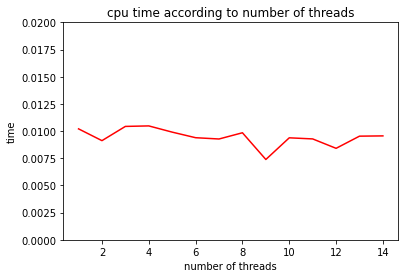

In [132]:
pyplot.plot(I,values,'-',color ='r')
pyplot.title("cpu time according to number of threads")
pyplot.xlabel("number of threads")
pyplot.ylabel("time")
pyplot.ylim(0,0.02)
#pyplot.legend()

I tried pyccelizing the function and paralelizing it at the same time but it dosen't work for me !!

## Exercise 2:

Using your code Navier Stokes equation from the `numba_pyccel_assignments`:
1. Pyccelize the Navier Stokes equation (if it's not done).
2. Parallelize it using OpenMP.
3. Compare cpu time using different number of threads (Plot a figure of cpu time according to number of threads)

## Pure function

In [2]:
def build_up_b_pure(b, rho, dt, u, v, dx, dy):
    row, col = p.shape
        
        
    #fill the update of b
    b[1:-1, 1:-1] = (rho * (1 / dt * 
                    ((u[1:-1, 2:] - u[1:-1, 0:-2]) / 
                     (2 * dx) + (v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy)) -
                    ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx))**2 -
                      2 * ((u[2:, 1:-1] - u[0:-2, 1:-1]) / (2 * dy) *
                           (v[1:-1, 2:] - v[1:-1, 0:-2]) / (2 * dx))-
                          ((v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy))**2))

    return b

def pressure_poisson_pure(p, dx, dy, b):
    pn = numpy.empty_like(p)
    pn = numpy.copy(p)
    #fill the update of p
    
    for q in range(nit):
        pn = p.copy()
        p[1:-1, 1:-1] = (((pn[1:-1, 2:] + pn[1:-1, 0:-2]) * dy**2 + 
                          (pn[2:, 1:-1] + pn[0:-2, 1:-1]) * dx**2) /
                          (2 * (dx**2 + dy**2)) -
                          dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * 
                          b[1:-1,1:-1])

        p[:, -1] = p[:, -2] # dp/dx = 0 at x = 2
        p[0, :] = p[1, :]   # dp/dy = 0 at y = 0
        p[:, 0] = p[:, 1]   # dp/dx = 0 at x = 0
        p[-1, :] = 0        # p = 0 at y = 2
        
    return p

def cavity_flow_pure(nt, u, v, dt, nx, ny, dx, dy, p, rho, nu):
    un = numpy.empty_like(u)
    vn = numpy.empty_like(v)
    b = numpy.zeros((ny, nx))
    
    pn = numpy.empty_like(p)
    pn = p.copy()
    
    #fill the update of u and v
    for n in range(nt):
        un = u.copy()
        vn = v.copy()
        b = build_up_b_pure(b, rho, dt, u, v, dx, dy)
        p = pressure_poisson_pure(p, dx, dy, b)
        u[1:-1, 1:-1] = (un[1:-1, 1:-1]-
                        un[1:-1, 1:-1] * dt / dx *
                    (un[1:-1, 1:-1] - un[1:-1, 0:-2]) -
                        vn[1:-1, 1:-1] * dt / dy *
                    (un[1:-1, 1:-1] - un[0:-2, 1:-1]) -
                        dt / (2 * rho * dx) * (p[1:-1, 2:] - p[1:-1, 0:-2]) +
                        nu * (dt / dx**2 *
                    (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                        dt / dy**2 *
                    (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1])))
        v[1:-1,1:-1] = (vn[1:-1, 1:-1] -
                    un[1:-1, 1:-1] * dt / dx *
                    (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                    vn[1:-1, 1:-1] * dt / dy *
                    (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) -
                    dt / (2 * rho * dy) * (p[2:, 1:-1] - p[0:-2, 1:-1]) +
                    nu * (dt / dx**2 *
                    (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                    dt / dy**2 *
                    (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1])))

    u[0, :]  = 0
    u[:, 0]  = 0
    u[:, -1] = 0
    u[-1, :] = 1    # set velocity on cavity lid equal to 1
    v[0, :]  = 0
    v[-1, :] = 0
    v[:, 0]  = 0
    v[:, -1] = 0
        
        
    return u, v, p

## Inputs

In [3]:
nx = 41
ny = 41
nt = 500
nit = 50
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)
X, Y = np.meshgrid(x, y)

rho = 1
nu = .1
dt = .001

u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
un = np.ones((ny, nx))
vn = np.ones((ny, nx))
p = np.zeros((ny, nx))
pn = np.ones((ny, nx)) 
b = np.zeros((ny, nx))

## Pyccelizing the Navier Stocks Function

In [91]:
def cavity_flow_pyc(b: 'float[:,:]',nt:'int', u: 'float[:,:]', v: 'float[:,:]', dt: 'float', nx: 'int', ny: 'int', dx: 'float', dy: 'float', p: 'float[:,:]', rho: 'int', nu:'float',un: 'float[:,:]',vn: 'float[:,:]',pn: 'float[:,:]'):
    
    row,col = u.shape
    
    #fill the update of u and v
    for n in range(nt):
        for i in range(row):
            for j in range(col):
                un[i,j] = u[i,j]
                vn[i,j] = v [i,j]
                pn[i,j] = p [i,j]
                
        # Updqte b
        b[1:-1, 1:-1] = (rho * (1 / dt * ((u[1:-1, 2:] - u[1:-1, 0:-2]) / 
                    (2 * dx) + (v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy)) -
                    ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx))**2 -
                      2 * ((u[2:, 1:-1] - u[0:-2, 1:-1]) / (2 * dy) *
                           (v[1:-1, 2:] - v[1:-1, 0:-2]) / (2 * dx))-
                          ((v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy))**2))
        # Updqte P       
        p[1:-1, 1:-1] = (((pn[1:-1, 2:] + pn[1:-1, 0:-2]) * dy**2 + 
                          (pn[2:, 1:-1] + pn[0:-2, 1:-1]) * dx**2) /
                          (2 * (dx**2 + dy**2)) -
                          dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * 
                          b[1:-1,1:-1])

        p[:, -1] = p[:, -2] # dp/dx = 0 at x = 2
        p[0, :] = p[1, :]   # dp/dy = 0 at y = 0
        p[:, 0] = p[:, 1]   # dp/dx = 0 at x = 0
        p[-1, :] = 0 
        # Updqte U   
        u[1:-1, 1:-1] = (un[1:-1, 1:-1]-
                        un[1:-1, 1:-1] * dt / dx *
                    (un[1:-1, 1:-1] - un[1:-1, 0:-2]) -
                        vn[1:-1, 1:-1] * dt / dy *
                    (un[1:-1, 1:-1] - un[0:-2, 1:-1]) -
                        dt / (2 * rho * dx) * (p[1:-1, 2:] - p[1:-1, 0:-2]) +
                        nu * (dt / dx**2 *
                    (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                        dt / dy**2 *
                    (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1])))
        # Updqte V
        v[1:-1,1:-1] = (vn[1:-1, 1:-1] -
                    un[1:-1, 1:-1] * dt / dx *
                    (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                    vn[1:-1, 1:-1] * dt / dy *
                    (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) -
                    dt / (2 * rho * dy) * (p[2:, 1:-1] - p[0:-2, 1:-1]) +
                    nu * (dt / dx**2 *
                    (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                    dt / dy**2 *
                    (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1])))

    u[0, :]  = 0
    u[:, 0]  = 0
    u[:, -1] = 0
    u[-1, :] = 1    # set velocity on cavity lid equal to 1
    v[0, :]  = 0
    v[-1, :] = 0
    v[:, 0]  = 0
    v[:, -1] = 0
        
        

In [92]:
cavity_flow_pyccel = epyccel(cavity_flow_pyc)

In [95]:
# pure Navier Stocks function
#Satrting time
cpu_0 = time.process_time()
#Execution
cavity_flow_pure(nt, u, v, dt, nx, ny, dx, dy, p, rho, nu)
#CPU time
cpu_1 = time.process_time()
cpu = cpu_1 - cpu_0
print("CPU time       :", cpu,        '\n')

CPU time       : 1.4158569059999984 



In [94]:
# Pyccilized Navier Stocks function
#Satrting time
cpu_0 = time.process_time()
#Execution
cavity_flow_pyccel(b,nt, u, v, dt, nx, ny, dx, dy, p, rho, nu, un, vn, pn)
#CPU time
cpu_1 = time.process_time()
cpu = cpu_1 - cpu_0
print("CPU time       :", cpu,        '\n')

CPU time       : 0.015991002999999893 



In [103]:
a,b=u.shape

## Prallelizing, Openmp

In [20]:
%%file Navier_Stocks.py

def cavity_flow_pyc(b: 'float[:,:]',nt:'int', u: 'float[:,:]', v: 'float[:,:]', dt: 'float', nx: 'int', ny: 'int', dx: 'float', dy: 'float', p: 'float[:,:]', rho: 'int', nu:'float',un: 'float[:,:]',vn: 'float[:,:]',pn: 'float[:,:]'):
    row,col = u.shape
    #$ omp parallel
    for n in range(nt):
        for i in range(row):
            for j in range(col):
                un[i,j] = u[i,j]
                vn[i,j] = v [i,j]
                pn[i,j] = p [i,j]
                
        # Updqte b
        b[1:-1, 1:-1] = (rho * (1 / dt * ((u[1:-1, 2:] - u[1:-1, 0:-2]) / 
                    (2 * dx) + (v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy)) -
                    ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx))**2 -
                      2 * ((u[2:, 1:-1] - u[0:-2, 1:-1]) / (2 * dy) *
                           (v[1:-1, 2:] - v[1:-1, 0:-2]) / (2 * dx))-
                          ((v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy))**2))
        # Updqte P       
        p[1:-1, 1:-1] = (((pn[1:-1, 2:] + pn[1:-1, 0:-2]) * dy**2 + 
                          (pn[2:, 1:-1] + pn[0:-2, 1:-1]) * dx**2) /
                          (2 * (dx**2 + dy**2)) -
                          dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * 
                          b[1:-1,1:-1])

        p[:, -1] = p[:, -2] # dp/dx = 0 at x = 2
        p[0, :] = p[1, :]   # dp/dy = 0 at y = 0
        p[:, 0] = p[:, 1]   # dp/dx = 0 at x = 0
        p[-1, :] = 0 
        # Updqte U   
        u[1:-1, 1:-1] = (un[1:-1, 1:-1]-
                        un[1:-1, 1:-1] * dt / dx *
                    (un[1:-1, 1:-1] - un[1:-1, 0:-2]) -
                        vn[1:-1, 1:-1] * dt / dy *
                    (un[1:-1, 1:-1] - un[0:-2, 1:-1]) -
                        dt / (2 * rho * dx) * (p[1:-1, 2:] - p[1:-1, 0:-2]) +
                        nu * (dt / dx**2 *
                    (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                        dt / dy**2 *
                    (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1])))
        # Updqte V
        v[1:-1,1:-1] = (vn[1:-1, 1:-1] -
                    un[1:-1, 1:-1] * dt / dx *
                    (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                    vn[1:-1, 1:-1] * dt / dy *
                    (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) -
                    dt / (2 * rho * dy) * (p[2:, 1:-1] - p[0:-2, 1:-1]) +
                    nu * (dt / dx**2 *
                    (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                    dt / dy**2 *
                    (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1])))
    #$ omp end parallel

    u[0, :]  = 0
    u[:, 0]  = 0
    u[:, -1] = 0
    u[-1, :] = 1    # set velocity on cavity lid equal to 1
    v[0, :]  = 0
    v[-1, :] = 0
    v[:, 0]  = 0
    v[:, -1] = 0
    
if __name__ == "__main__":
    
    import numpy as np

    nx = 41
    ny = 41
    nt = 500
    nit = 50
    c = 1
    dx = 2 / (nx - 1)
    dy = 2 / (ny - 1)

    rho = 1
    nu = .1
    dt = .001

    u = np.zeros((ny, nx))
    v = np.zeros((ny, nx))
    un = np.ones((ny, nx))
    vn = np.ones((ny, nx))
    p = np.zeros((ny, nx))
    pn = np.ones((ny, nx)) 
    b = np.zeros((ny, nx))
    
    cavity_flow_pyc(b,nt, u, v, dt, nx, ny, dx, dy, p, rho, nu,un,vn,pn)  

Overwriting Navier_Stocks.py


In [21]:
!pyccel Navier_Stocks.py --language=c --openmp

## 16 threads

In [22]:
#Satrting time
cpu_0 = time.process_time()
#Execution
!export OMP_NUM_THREADS=16; ./Navier_Stocks
#CPU time
cpu_1 = time.process_time()
cpu = cpu_1 - cpu_0
print("CPU time       :", cpu,        '\n')

CPU time       : 0.011384267999999587 



In [24]:
#values = []
#X = []

## 10 threads

In [13]:
#Satrting time
cpu_0 = time.process_time()
#Execution
!export OMP_NUM_THREADS=18; ./Navier_Stocks
#CPU time
cpu_1 = time.process_time()
cpu = cpu_1 - cpu_0
values.append(cpu)
X.append(18)

In [14]:
X

[3, 5, 7, 9, 12, 15, 18]

In [15]:
values

[0.010118961999999954,
 0.009944014000000223,
 0.011426464000000358,
 0.010406941999999919,
 0.01003813599999992,
 0.011609079999999938,
 0.011314227999999815]

(0.0, 0.02)

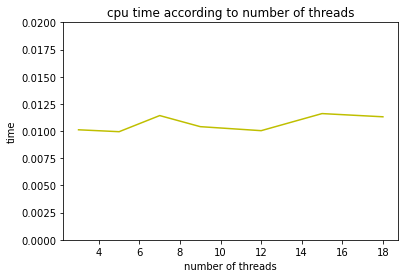

In [16]:
pyplot.plot(X,values,'-',color ='y')
pyplot.title("cpu time according to number of threads")
pyplot.xlabel("number of threads")
pyplot.ylabel("time")
pyplot.ylim(0,0.02)